In [162]:
%load_ext autoreload
%autoreload 2

The autoreload extension is already loaded. To reload it, use:
  %reload_ext autoreload


In [163]:
import numpy as np
import pandas as pd
import warnings
import sys

sys.path.append("../src")
from margin_calibration import MarginCalibration

In [165]:
warnings.simplefilter("ignore")

# Dataset Generation

In [167]:
# Create a 100 random observations with their respective
# sampling weights, such that those weights sum to 20 %
n_obs = 100
sampling_probabilities = np.random.rand(n_obs, 1).flatten()
sampling_probabilities = sampling_probabilities / sampling_probabilities.sum() *.2

# Create a matrix of size n_obs * n_margins, with margins ranging from 0 to 1000
n_margins = 2 # Let say we have two variables
calibration_matrix = 1000*np.random.rand(n_obs, n_margins)

# Now we create the calibration target
# It is of sier n_margins * 1 and contains the 
# sums of the margins over all the population
calibration_target = np.array([np.sum(calibration_matrix[:, i])*100 for i in range(calibration_matrix.shape[1])])

# The costs should be of size of the number of margins
costs = (1,1) # We give here same costs to both variables

# Margin Calibration

In [169]:
mc=MarginCalibration()
mc_logit=MarginCalibration("logit", .5, 1.5)
mc_rr=MarginCalibration("raking_ratio")
mc_lt=MarginCalibration("truncated_linear", .5, 1.5)

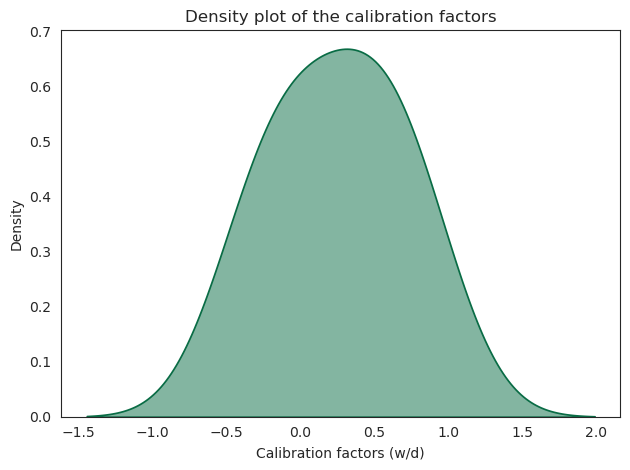

CPU times: user 10.2 s, sys: 27.3 ms, total: 10.3 s
Wall time: 3.1 s


array([ 2.57421767e+02,  3.58064809e+02, -1.16025285e+01, -6.67542399e+01,
        2.76101409e+02,  3.80217397e+02,  1.05205598e+02, -5.04697602e+01,
        1.54199949e+03,  2.20871127e+02,  1.87444293e+02,  7.11783519e+02,
        6.78594493e+02, -1.64768355e+02,  7.36166912e+01,  5.69686763e+01,
       -6.10260970e+01,  4.98134741e+01,  3.27112244e+02,  2.33972490e+02,
       -8.63377494e+02,  3.00913239e+02,  1.78416010e+02, -2.43277550e+02,
        2.97391762e+02,  9.45737156e+02,  2.39329001e+02, -4.42369823e+01,
       -1.31314951e+02,  7.79525275e+01,  4.33460265e+01, -1.64221693e+02,
       -1.23322816e+04,  7.94478231e+02,  1.31296473e+02,  6.03709471e+01,
       -4.40097920e+01,  7.26361364e+02, -1.19680585e+02,  1.55174688e+02,
        1.29688605e+02,  7.20288515e+02, -4.26780104e+01,  9.56900082e+01,
        2.88916297e+02,  5.24298506e+02, -2.99326882e+03,  7.36945950e+02,
       -1.76714509e+02,  3.66355104e+04, -9.10467298e+01,  2.31587440e+02,
       -6.58944993e+01,  

In [171]:
%%time
mc.calibration(sampling_probabilities, calibration_matrix, calibration_target)

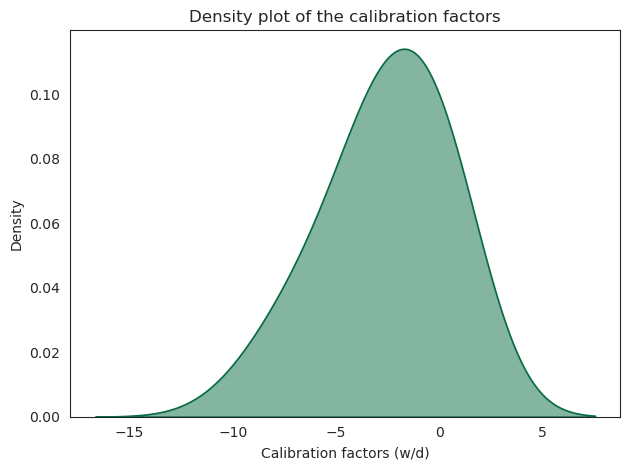

CPU times: user 20h 23min 43s, sys: 2min 4s, total: 20h 25min 47s
Wall time: 1h 21min 41s


array([-2.42960311e+03, -2.27171312e+02, -1.98913842e+03, -2.56643071e+03,
       -1.60884501e+03,  2.63358109e+02, -1.37046296e+03, -1.84674535e+03,
        9.57122224e+02, -6.92546550e+02, -6.74782631e+02,  3.45145676e+03,
        3.41106417e+02, -2.41354192e+03, -1.37658215e+03, -7.93130116e+02,
       -2.42195446e+03, -2.06085335e+03, -2.23326259e+03, -7.94454244e+02,
       -8.36835413e+02,  2.46930362e+02, -8.74534658e+02, -2.21526405e+03,
       -4.25945080e+02,  6.95520662e+02, -4.60325267e+02, -2.13853119e+03,
       -2.28157938e+03, -5.76082692e+01, -1.97279453e+03, -3.02479416e+03,
        4.02808054e+04,  6.44273702e+02, -1.03877871e+03, -1.31508690e+03,
       -1.70081542e+03,  8.63634444e+02, -2.81114134e+03, -7.37989832e+02,
       -1.33311942e+03,  4.03185751e+02, -2.85583875e+03, -1.86324638e+03,
       -7.86161364e+02,  3.12807336e+02,  5.88447912e+03,  2.65571675e+02,
       -2.73662016e+03,  9.12329551e+04, -4.84081539e+02, -9.75803206e+02,
       -2.15944767e+03,  

In [173]:
%%time
mc_logit.calibration(sampling_probabilities, calibration_matrix, calibration_target)

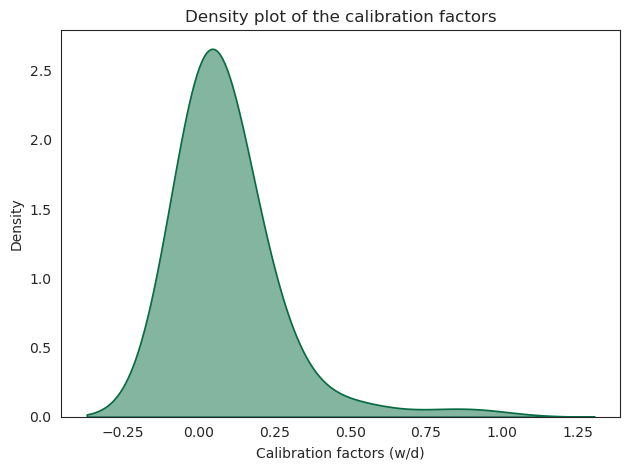

CPU times: user 11min 17s, sys: 897 ms, total: 11min 18s
Wall time: 22.6 s


array([1.77912286e+01, 7.96597670e+01, 6.80251692e+00, 1.63676748e+00,
       2.21371210e+01, 2.19496921e+02, 1.21037089e+01, 2.62053647e+00,
       9.10402249e+02, 4.17322304e+01, 6.69272575e+01, 1.28438146e+02,
       5.24343584e+01, 1.17764581e+00, 1.03046435e+01, 1.70740832e+01,
       1.34008371e+00, 4.11748472e+00, 2.25301695e+01, 4.51302752e+01,
       7.41135077e+00, 2.85505993e+02, 2.51725466e+01, 2.37855435e+00,
       6.70045932e+01, 1.37314064e+02, 5.96678398e+01, 2.61541705e+00,
       2.95678069e+00, 2.33812702e+01, 7.29542345e+00, 5.45197011e-01,
       1.49072310e+02, 2.47778782e+02, 2.15835890e+01, 1.06273821e+01,
       4.22515477e+00, 1.40567278e+02, 6.32561421e-01, 3.52471662e+01,
       1.46519378e+01, 6.06788475e+02, 9.37427985e-01, 8.03085252e+00,
       2.67593959e+01, 1.42465051e+02, 2.49302880e+01, 7.29358531e+01,
       1.19940973e+00, 7.89345730e+03, 2.23281582e+01, 2.86679224e+01,
       2.28074044e+00, 2.64293687e+02, 4.42285763e+00, 3.28704820e+00,
      

In [175]:
%%time
mc_rr.calibration(sampling_probabilities, calibration_matrix, calibration_target)

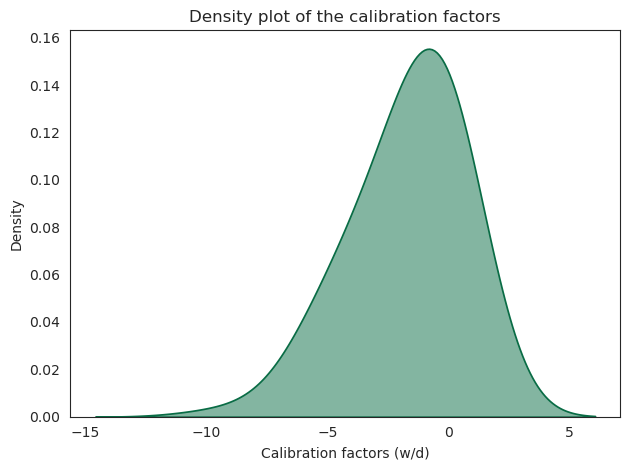

CPU times: user 2h 18min 46s, sys: 10.4 s, total: 2h 18min 57s
Wall time: 4min 37s


array([-4.85848278e+02, -3.21622027e+02, -9.34426979e+02, -1.92497674e+03,
       -1.08307431e+03,  2.27880155e+02, -7.55521326e+02, -1.22495468e+03,
        1.49671468e+03, -5.03100057e+02, -1.53927429e+02,  1.28253143e+03,
       -4.49244813e+02, -2.02894094e+03, -1.02420428e+03, -5.65251496e+02,
       -1.33656205e+03, -1.92862892e+03, -3.97334522e+02, -4.22315035e+02,
        1.77990997e+02,  2.98845746e+02, -1.19090388e+02, -1.24774588e+03,
       -3.40265150e+01, -1.20667556e+02, -8.53340402e+01, -1.46499097e+03,
       -1.63223323e+03,  3.34104805e+02, -1.35640957e+03, -2.27141631e+03,
        3.06953548e+04,  5.23864719e+02, -4.18081576e+02, -1.07967797e+03,
       -1.46326548e+03,  5.85970027e+02, -1.69436104e+03, -5.50767331e+02,
       -4.82882974e+02,  7.09250949e+02, -2.69501039e+03, -1.17800575e+03,
       -9.51735261e+02,  3.19801788e+02,  3.79479200e+03, -2.42930940e+02,
       -2.39277981e+03,  5.98045683e+04,  3.08779281e+02, -8.25945581e+02,
       -1.54505228e+03,  

In [177]:
%%time
mc_lt.calibration(sampling_probabilities, calibration_matrix, calibration_target)

# Penalized Margin Calibration

In [179]:
mc_pen=MarginCalibration(penalty=.1, costs=costs)
mc_logit_pen=MarginCalibration("logit", .5, 1.5, penalty=.1, costs=costs)
mc_rr_pen=MarginCalibration("raking_ratio", penalty=.1, costs=costs)
mc_lt_pen=MarginCalibration("truncated_linear", .5, 1.5, penalty=.1, costs=costs)

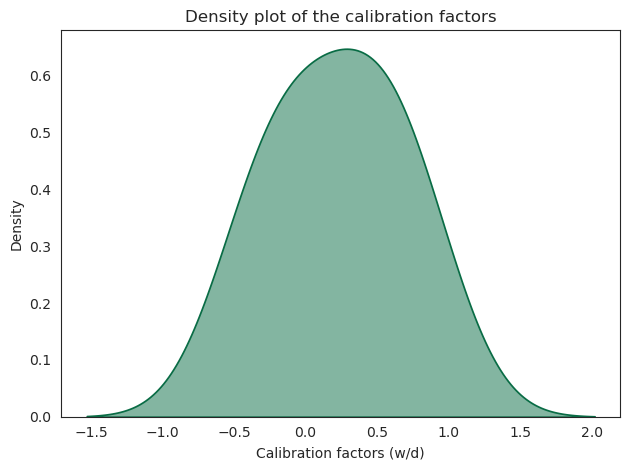

CPU times: user 6.7 s, sys: 23.4 ms, total: 6.72 s
Wall time: 269 ms


array([ 2.17378709e+02,  3.52424881e+02, -3.69268641e+01, -8.36264641e+01,
        2.62034975e+02,  3.78645168e+02,  9.74763155e+01, -6.15767850e+01,
        1.53149870e+03,  2.11613574e+02,  1.84128237e+02,  5.31278187e+02,
        6.44026578e+02, -1.82522794e+02,  6.31824709e+01,  3.94619927e+01,
       -7.29145307e+01,  4.07511850e+01,  2.91542141e+02,  2.27863953e+02,
       -9.58328288e+02,  3.00747519e+02,  1.73733971e+02, -2.71196600e+02,
        2.93644792e+02,  9.24386760e+02,  2.29023904e+02, -5.73984612e+01,
       -1.56913584e+02,  5.29961298e+01,  2.22274940e+01, -1.83813392e+02,
       -1.51027158e+04,  7.82415081e+02,  1.25493782e+02,  4.95212779e+01,
       -5.76332878e+01,  6.98418929e+02, -1.34872903e+02,  1.48371609e+02,
        1.22744828e+02,  7.18920007e+02, -5.54870214e+01,  8.39705232e+01,
        2.78702980e+02,  5.14668690e+02, -3.56330274e+03,  7.07188536e+02,
       -2.02030915e+02,  3.45621170e+04, -1.48401873e+02,  2.21820318e+02,
       -7.95620458e+01,  

In [181]:
%%time
mc_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)

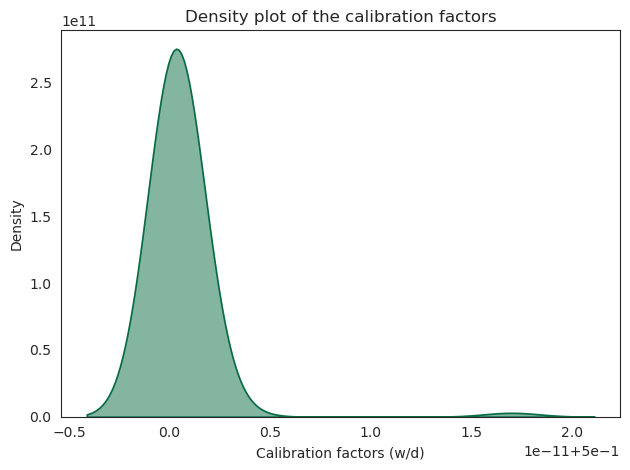

CPU times: user 7.53 s, sys: 23.2 ms, total: 7.55 s
Wall time: 1.25 s


array([  610.84766756,   222.37466456,   348.16273672,   199.92354775,
         282.44886387,   198.39023271,   162.11301518,   139.31064485,
         907.35297319,   237.29561394,   143.13295711,  3026.94028604,
         700.21022847,   188.80257305,   182.16348321,   301.29347426,
         140.90447864,   135.78548777,   576.31175737,   188.53686855,
        1002.1798432 ,   152.45063553,   135.01967045,   308.43613054,
         167.13648563,   654.01801011,   280.86192356,   169.90285884,
         300.09163598,   409.38152953,   301.59131882,   189.27215537,
       30693.12647437,   538.91074897,   142.3850144 ,   188.87667112,
         184.87808741,   743.55304331,   151.42015886,   179.36839135,
         146.10506495,   377.37740565,   141.76666494,   194.81086166,
         240.63303799,   375.34152653,  5917.07959701,   680.58503437,
         259.30236831, 53206.43794705,   829.79565028,   226.17626341,
         170.5178589 ,   468.14801662,   284.31286291,   257.9154679 ,
      

In [183]:
%%time
mc_logit_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)

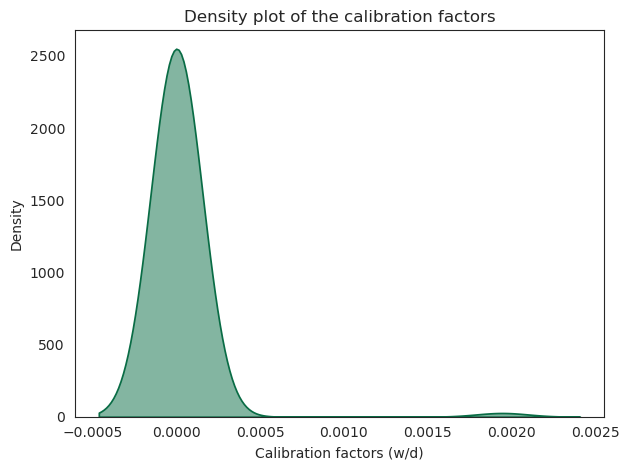

CPU times: user 7.53 s, sys: 15.4 ms, total: 7.54 s
Wall time: 1.23 s


array([3.03175468e-06, 9.87753386e-06, 2.34564120e-06, 1.91026304e-06,
       4.58830619e-06, 3.17412400e-05, 3.60254970e-06, 1.96873464e-06,
       1.79863924e-05, 4.42789255e-06, 5.43727788e-06, 2.58319797e-06,
       4.51921954e-06, 5.18169066e-08, 2.92323904e-06, 1.65827434e-06,
       2.26855544e-06, 2.89202458e-06, 3.34479004e-06, 6.45526976e-06,
       1.32048251e-06, 1.52092427e-04, 5.67468325e-06, 1.42614098e-06,
       1.15388811e-05, 7.36919754e-06, 2.93570092e-06, 2.46776974e-06,
       1.86838981e-06, 1.83186854e-06, 2.62104326e-06, 1.49837497e-06,
       2.16092083e-06, 9.30393959e-06, 4.51500300e-06, 2.65159257e-06,
       1.76390110e-06, 4.69254110e-06, 1.94210991e-06, 3.54195210e-06,
       4.52475470e-06, 3.56225646e-05, 1.83588097e-06, 3.16004609e-06,
       5.47457388e-06, 8.03362857e-06, 1.50147400e-06, 5.07997325e-06,
       8.81535606e-07, 2.06973060e+02, 1.93707737e-06, 5.00544966e-06,
       2.17599381e-06, 1.42780549e-05, 2.50686488e-06, 2.15520675e-06,
      

In [185]:
%%time
mc_rr_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)

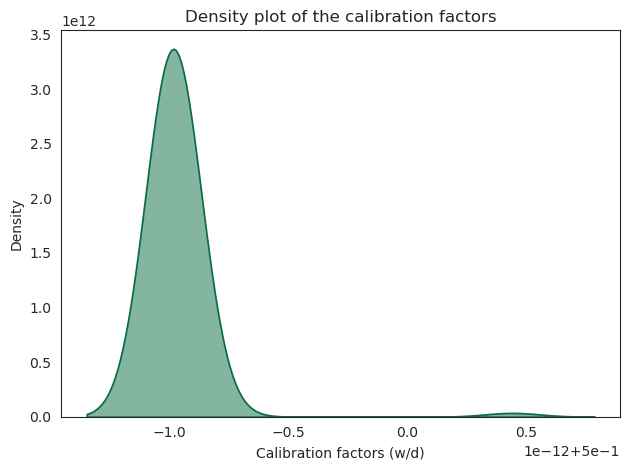

CPU times: user 7.81 s, sys: 11.8 ms, total: 7.82 s
Wall time: 1.52 s


array([  610.84766756,   222.37466456,   348.16273672,   199.92354775,
         282.44886387,   198.39023271,   162.11301518,   139.31064485,
         907.35297319,   237.29561394,   143.13295711,  3026.94028604,
         700.21022847,   188.80257305,   182.16348321,   301.29347426,
         140.90447864,   135.78548777,   576.31175737,   188.53686855,
        1002.1798432 ,   152.45063552,   135.01967045,   308.43613054,
         167.13648563,   654.01801011,   280.86192356,   169.90285884,
         300.09163598,   409.38152953,   301.59131882,   189.27215537,
       30693.12647437,   538.91074897,   142.3850144 ,   188.87667112,
         184.87808741,   743.55304331,   151.42015886,   179.36839135,
         146.10506495,   377.37740564,   141.76666494,   194.81086166,
         240.63303799,   375.34152653,  5917.07959701,   680.58503437,
         259.30236831, 53206.43794705,   829.79565028,   226.17626341,
         170.5178589 ,   468.14801662,   284.31286291,   257.9154679 ,
      

In [186]:
%%time
mc_lt_pen.calibration(sampling_probabilities, calibration_matrix, calibration_target)